# ABALONE DATASET

Abalone Case Study
Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

Linearnity: assumes that the reletionship between predaators and target is linear
no noice : which means no outliers in the data
No collinearity : if you have highly correlated predatprs, which means your model is over fit
Normal Distributions : more reliable predictions are made if the predators and target variables are normally distributed
Scale : its a distance based algorithim , so predators will be scaled like standadrd scaler

In [131]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDRegressor
import warnings
warnings.filterwarnings('ignore')

In [132]:
df=pd.read_csv('abalone.csv')

In [133]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [134]:
df.sample(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3949,F,0.525,0.415,0.150,0.7155,0.2355,0.1710,0.270,13
1662,F,0.605,0.455,0.145,0.9775,0.4680,0.1775,0.275,9
4171,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.229,8


In [135]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


# EDA Process

In [136]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [137]:
df=pd.DataFrame(data=df)

In [138]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [139]:
df.shape

(4177, 9)

In [140]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

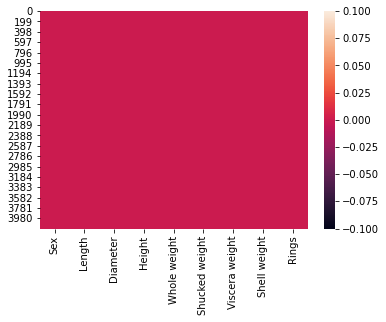

In [141]:
sns.heatmap(df.isnull())

In [142]:
df.iloc[:,0]

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [143]:
lencode=LabelEncoder()
df['Sex']=lencode.fit_transform(df['Sex'])

In [144]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# SCATTER Plot

<AxesSubplot:xlabel='Length', ylabel='Rings'>

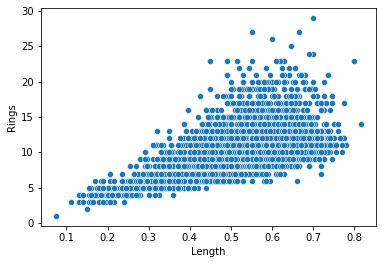

In [145]:
import seaborn as sns
sns.scatterplot(x="Length",y= "Rings",data=df)

<AxesSubplot:xlabel='Height', ylabel='Rings'>

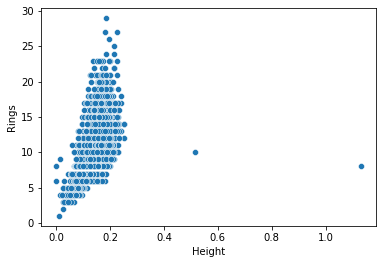

In [146]:
import seaborn as sns
sns.scatterplot(x="Height",y= "Rings",data=df)

<AxesSubplot:xlabel='Diameter', ylabel='Rings'>

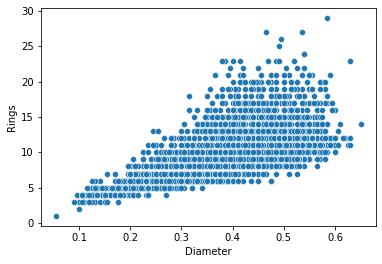

In [147]:
import seaborn as sns
sns.scatterplot(x="Diameter",y= "Rings",data=df)

<AxesSubplot:xlabel='Whole weight', ylabel='Rings'>

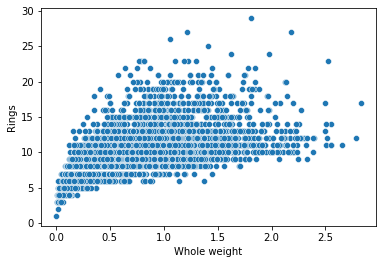

In [148]:
import seaborn as sns
sns.scatterplot(x="Whole weight",y= "Rings",data=df)

<AxesSubplot:xlabel='Shucked weight', ylabel='Rings'>

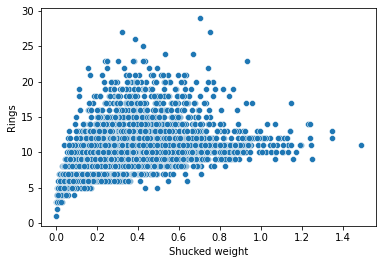

In [149]:
import seaborn as sns
sns.scatterplot(x="Shucked weight",y= "Rings",data=df)

<AxesSubplot:xlabel='Viscera weight', ylabel='Rings'>

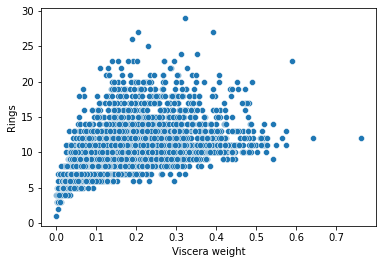

In [150]:
import seaborn as sns
sns.scatterplot(x="Viscera weight",y= "Rings",data=df)

<AxesSubplot:xlabel='Shell weight', ylabel='Rings'>

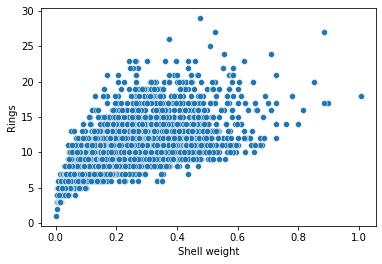

In [151]:
import seaborn as sns
sns.scatterplot(x="Shell weight",y= "Rings",data=df)

In [152]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Correlation:

In [23]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

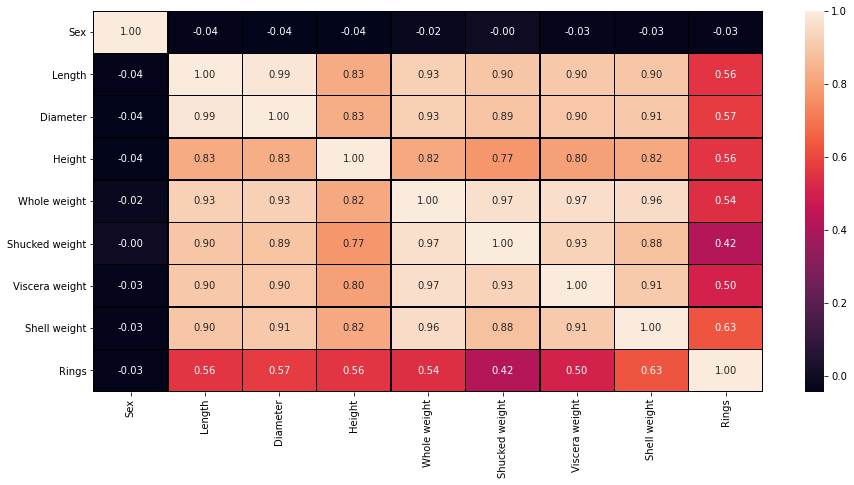

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f')


Correlation:
From the above result it is clear that columns making positive correlation.

The positively correlated columns has a great impact on the target column while the negative correlated has less or zero impact on the target column.

# Describe Heatmap

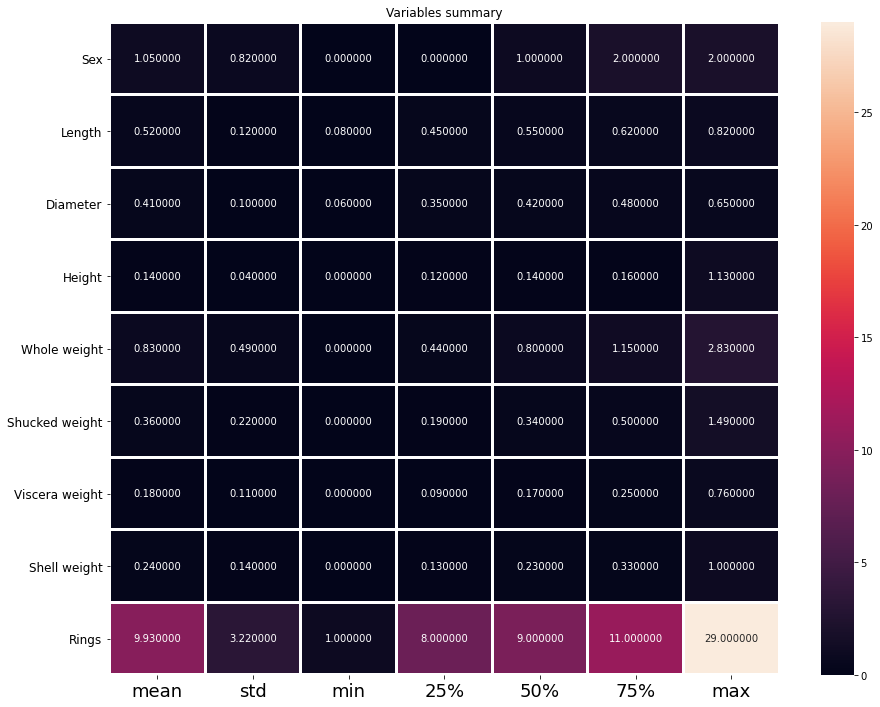

In [25]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()


# Discription of dataset

In [26]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Observation----------

Mean of height column is greater than median,hence it is right skewed. simlar with whole weight/ shucked weight . Standard deviation is high in whole weight,shucked weight . it means data spread is high.

High gap between 75% and Max is presented in rings. so few outliers is present.

# Now use subplot and displot to check data are normalised or not.

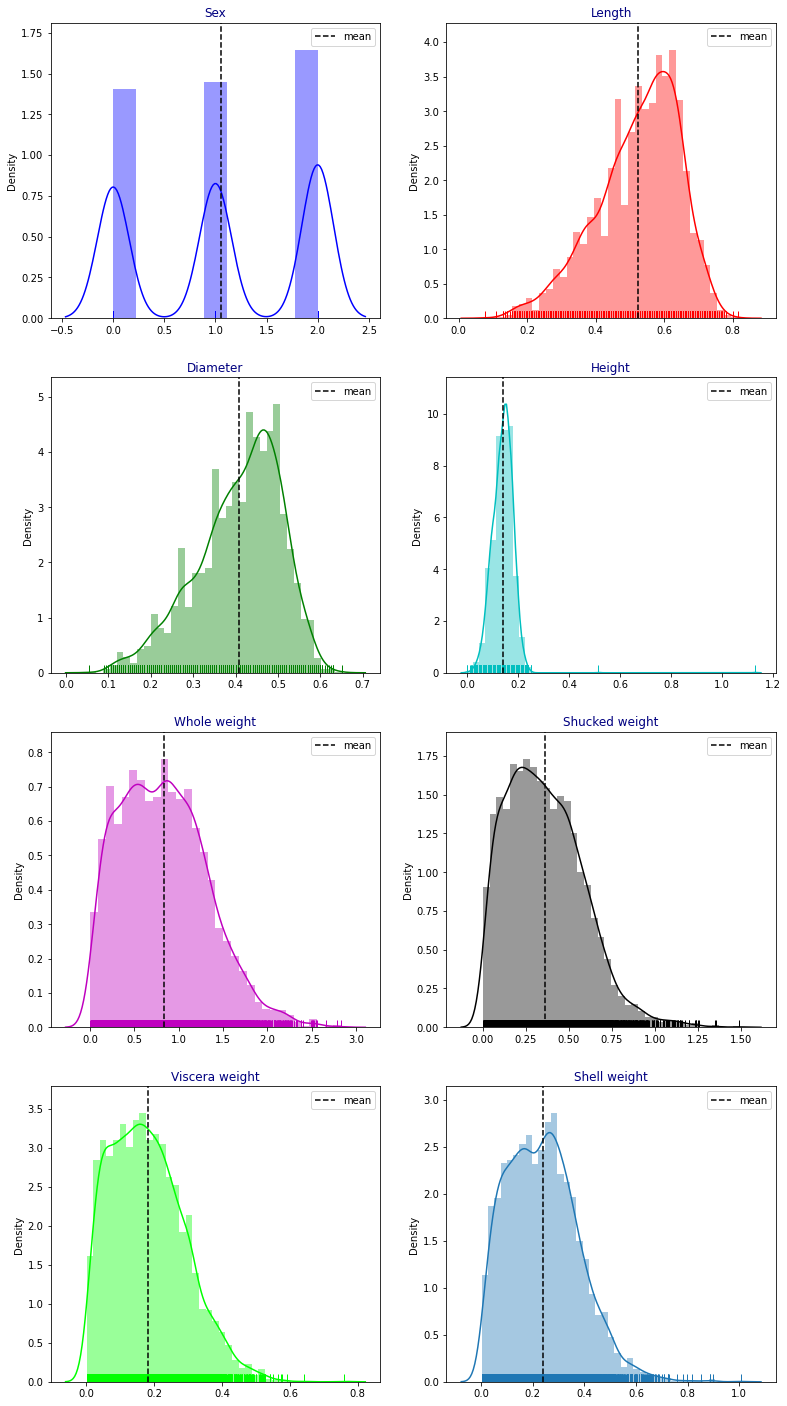

In [27]:
import itertools

cols = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight']
length = len(cols)
cs = ["b","r","g","c","m","k","lime"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

# Observation:
From the above observation, it is clear that the data are not normalised and we should proceed with the data cleaning method.

array([[<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>],
       [<AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

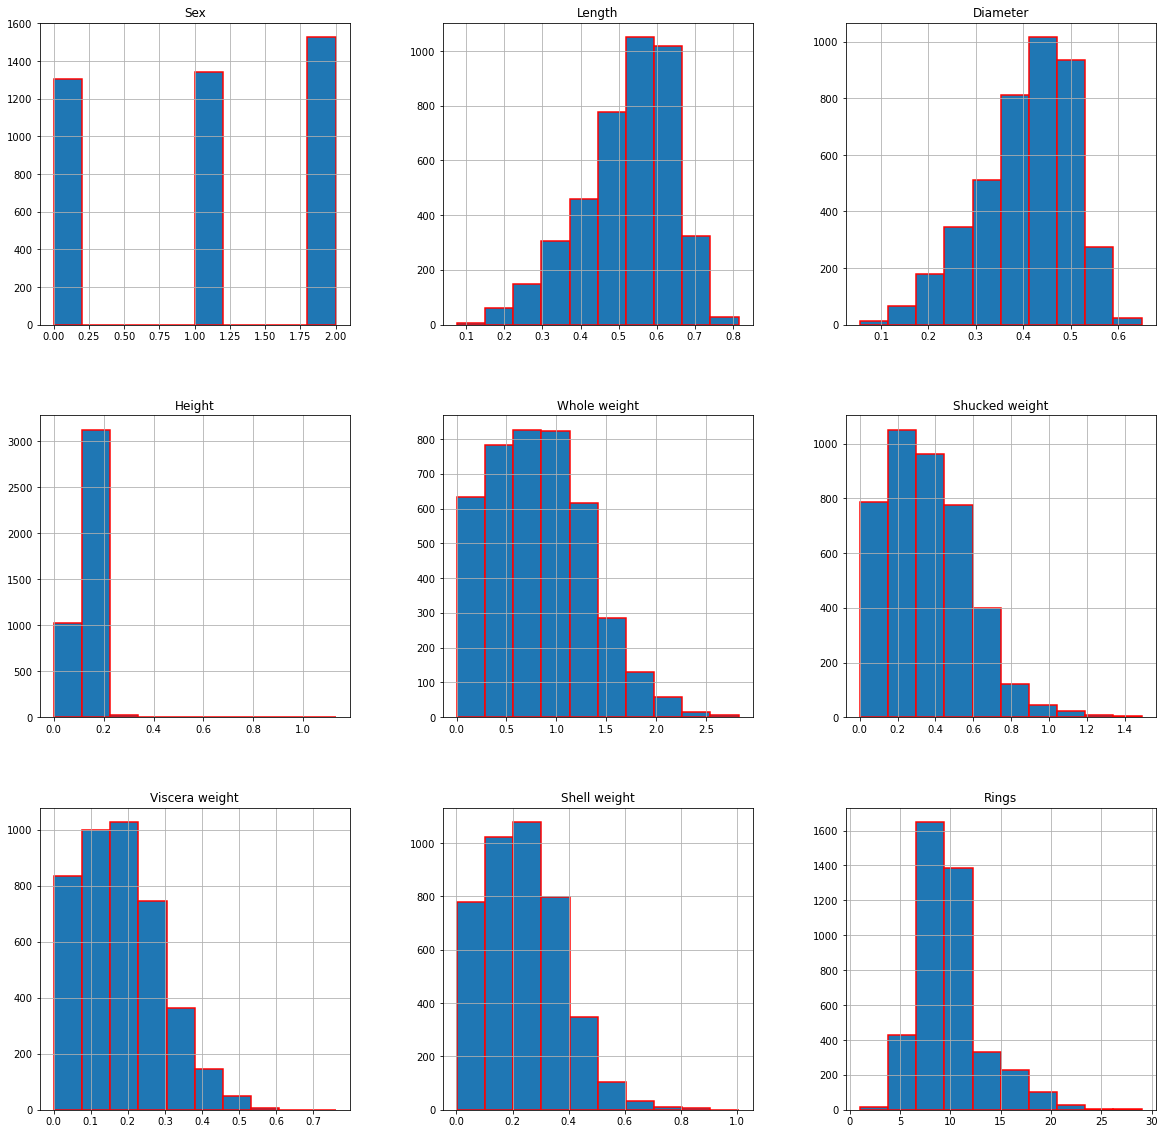

In [28]:
df.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

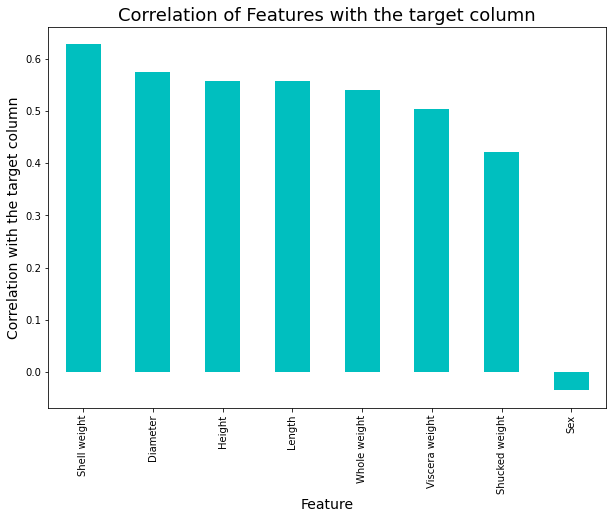

In [29]:
plt.figure(figsize=(10,7))
df.corr()['Rings'].sort_values(ascending=False).drop(['Rings']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with the target column',fontsize=18)
plt.show()


In [30]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

Skewness:
From the above observation the some columns falls under high skewness:

Data is skewed

# detecting outliers 

<AxesSubplot:>

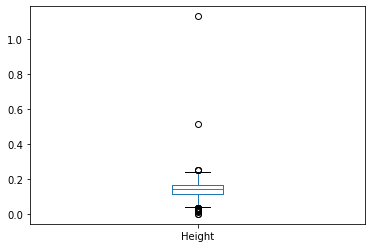

In [31]:
df['Height'].plot.box()

<AxesSubplot:>

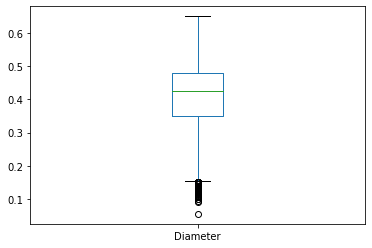

In [32]:
df['Diameter'].plot.box()

<AxesSubplot:>

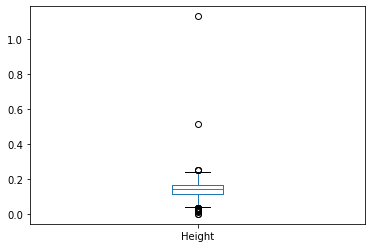

In [33]:
df['Height'].plot.box()

<AxesSubplot:>

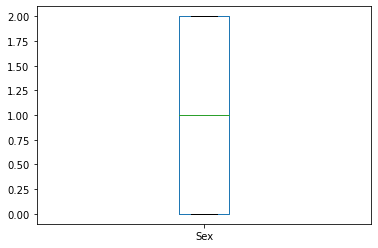

In [34]:
df['Sex'].plot.box()

In [35]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

<AxesSubplot:>

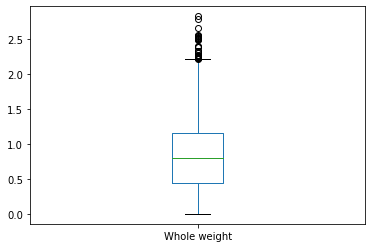

In [36]:
df['Whole weight'].plot.box()

<AxesSubplot:>

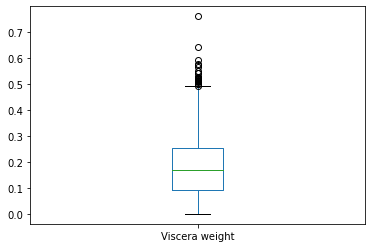

In [37]:
df['Viscera weight'].plot.box()

<AxesSubplot:>

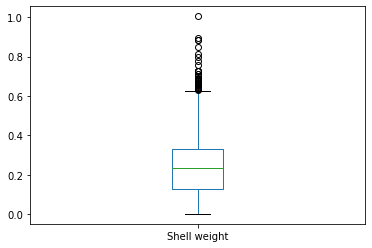

In [38]:
df['Shell weight'].plot.box()

<AxesSubplot:>

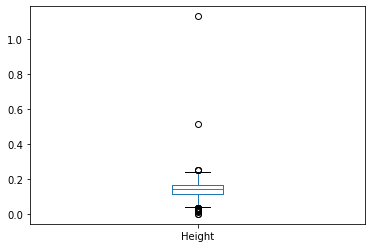

In [39]:
df['Height'].plot.box()

<AxesSubplot:>

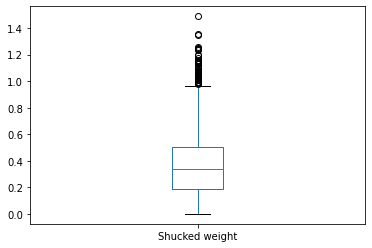

In [40]:
df['Shucked weight'].plot.box()

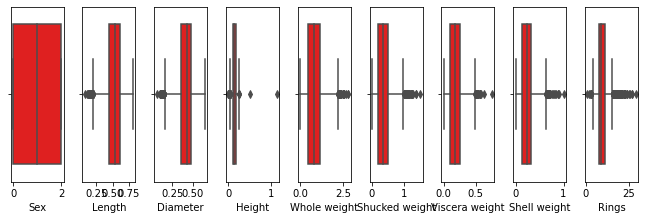

In [52]:
collist=df.columns.values
ncol=30
nrows=30
plt.figure(figsize=(ncol,3*(ncol)))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='red')
    plt.tight_layout()


# Check the percentage of data falls under outliers:

In [53]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
         166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
         238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
         334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
         433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
         674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
         754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
        1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
        1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
        1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
        1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
        2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
        2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
        2436, 2459, 2471, 2544, 2623, 

In [54]:
df_new=df[(z<3).all(axis=1)]

In [55]:
df_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [56]:
percentage_loss=((4177-4027)/4177)*100
print(percentage_loss)

3.5910940866650707


In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
x=df_new.iloc[:,0:-1]

In [66]:
x.shape

(4027, 8)

In [67]:
x.shape[1]

8

In [68]:
y=df_new.iloc[:,-1]
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4027, dtype: int64

In [69]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [70]:
vif_calc()

   VIF Factor        features
0    2.586539             Sex
1  711.017756          Length
2  762.862946        Diameter
3   92.050181          Height
4  441.600560    Whole weight
5  108.511496  Shucked weight
6   65.669278  Viscera weight
7   94.849108    Shell weight


# Data cleaning
feature engineering----selection pf feature/variable/columns
detect outlier/remove

In [71]:
df_new.drop(['Length','Shucked weight'],axis=1,inplace=True)

In [72]:
df_new

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.095,0.5140,0.1010,0.1500,15
1,2,0.265,0.090,0.2255,0.0485,0.0700,7
2,0,0.420,0.135,0.6770,0.1415,0.2100,9
3,2,0.365,0.125,0.5160,0.1140,0.1550,10
4,1,0.255,0.080,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490,11
4173,2,0.440,0.135,0.9660,0.2145,0.2605,10
4174,2,0.475,0.205,1.1760,0.2875,0.3080,9
4175,0,0.485,0.150,1.0945,0.2610,0.2960,10


In [73]:
x=df_new.iloc[:,:-1]

In [74]:
x.shape

(4027, 6)

In [75]:
vif_calc()

   VIF Factor        features
0    2.566983             Sex
1   85.744656        Diameter
2   89.121231          Height
3  132.613319    Whole weight
4   61.181551  Viscera weight
5   62.092580    Shell weight


<AxesSubplot:>

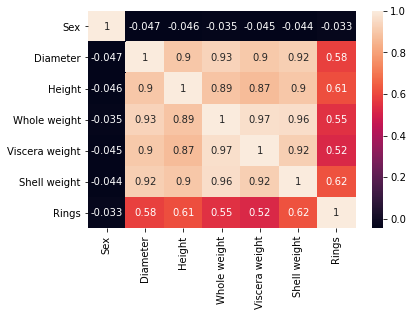

In [76]:
sns.heatmap(df_new.corr(),annot=True)

In [77]:
x=df_new.iloc[:,0:-1]
x

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,2,0.365,0.095,0.5140,0.1010,0.1500
1,2,0.265,0.090,0.2255,0.0485,0.0700
2,0,0.420,0.135,0.6770,0.1415,0.2100
3,2,0.365,0.125,0.5160,0.1140,0.1550
4,1,0.255,0.080,0.2050,0.0395,0.0550
...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490
4173,2,0.440,0.135,0.9660,0.2145,0.2605
4174,2,0.475,0.205,1.1760,0.2875,0.3080
4175,0,0.485,0.150,1.0945,0.2610,0.2960


In [78]:
x.shape

(4027, 6)

In [79]:
y.shape

(4027,)

In [80]:
df=df_new

In [81]:
df

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.095,0.5140,0.1010,0.1500,15
1,2,0.265,0.090,0.2255,0.0485,0.0700,7
2,0,0.420,0.135,0.6770,0.1415,0.2100,9
3,2,0.365,0.125,0.5160,0.1140,0.1550,10
4,1,0.255,0.080,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490,11
4173,2,0.440,0.135,0.9660,0.2145,0.2605,10
4174,2,0.475,0.205,1.1760,0.2875,0.3080,9
4175,0,0.485,0.150,1.0945,0.2610,0.2960,10


# Removing skewness by transforming data.

In [82]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.13432919, -0.54337947, -1.15893308, -0.57513463, -0.68803217,
        -0.58635376],
       [ 1.13432919, -1.40113174, -1.28040611, -1.35404959, -1.33285416,
        -1.33271691],
       [-1.31306782,  0.03716259, -0.12830502, -0.18449788, -0.24037305,
        -0.08021413],
       ...,
       [ 1.13432919,  0.70592133,  1.94363286,  0.85343427,  1.08965131,
         0.66363183],
       [-1.31306782,  0.8377131 ,  0.28606972,  0.69738476,  0.87642835,
         0.57752029],
       [ 1.13432919,  1.85550496,  1.62558351,  2.14577531,  1.73214622,
         1.85675543]])

# Regressor Model Building:
Linear Regression:

In [109]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score


In [110]:
max_scr=0
for i in range(0,1000):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(xtrain,ytrain)
    pred_train=lr.predict(xtrain)
    pred_test=lr.predict(xtest)
    if round(r2_score(ytrain,pred_train)*100,2)==round(r2_score(ytest,pred_test)*100,2):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-", r2_score(ytrain,pred_train)*100)
        print("Testing r2_score is:-", r2_score(ytest,pred_test)*100)

At random state 14  The model performs very well
At random_state:- 14
Training r2_score is:- 45.263049128361665
Testing r2_score is:- 45.26232350637998
At random state 717  The model performs very well
At random_state:- 717
Training r2_score is:- 45.29822283000276
Testing r2_score is:- 45.30171566757238


In [111]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=14)

In [176]:


lr=LinearRegression()
lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)

pred_test=lr.predict(xtest)

from sklearn.metrics import accuracy_score
r2_score(ytest,pred_test)


0.45262323506379976

# Regurlarization

# As we can easily analyis that data is not correctely fit in our model lets do some regurlization.

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# 1. Lasso

In [114]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [115]:
ls = Lasso(alpha=0.001,random_state=0)
ls.fit(xtrain,ytrain)
ls.score(xtrain,ytrain)
pred_ls = ls.predict(xtest)

lss = r2_score(ytest,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x,y,cv=j)
    lsc = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100 )
    print("R2_score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 45.022489262735355
R2_score is :- 45.28545314902954


At cv:- 3
Cross validation score is:- 43.36665480304593
R2_score is :- 45.28545314902954


At cv:- 4
Cross validation score is:- 35.048402685763634
R2_score is :- 45.28545314902954


At cv:- 5
Cross validation score is:- 35.085553641949815
R2_score is :- 45.28545314902954


At cv:- 6
Cross validation score is:- 35.647192743651644
R2_score is :- 45.28545314902954


At cv:- 7
Cross validation score is:- 36.51701824421767
R2_score is :- 45.28545314902954


At cv:- 8
Cross validation score is:- 33.064303700786866
R2_score is :- 45.28545314902954


At cv:- 9
Cross validation score is:- 35.729157921871376
R2_score is :- 45.28545314902954




In [116]:
print("At cv:-",2)
print("Cross validation score is:-",45.22 )
print("R2_score is :-",45.28)

At cv:- 2
Cross validation score is:- 45.22
R2_score is :- 45.28


In [117]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [118]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_ls))
print('Mean Squared Error:',mean_squared_error(ytest,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_ls)))

Error:
Mean Absolute Error: 1.4934108671908197
Mean Squared Error: 4.050947183263519
Root Mean Square Error: 2.0126964955659656


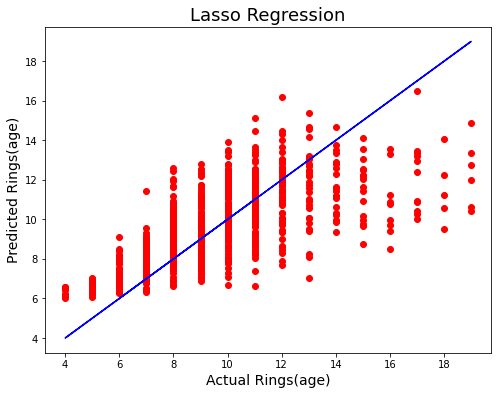

In [119]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_ls, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Rings(age)',fontsize=14)
plt.ylabel('Predicted Rings(age)',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

# 2. Ridge

In [120]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'normalize': False, 'random_state': 0, 'tol': 0.001}


In [172]:
rd = Ridge(alpha=0.1, copy_X= True, fit_intercept= True, normalize=False, random_state= 0, tol= 0.001)
rd.fit(xtrain,ytrain)
rd.score(xtrain,ytrain)
pred_rd = rd.predict(xtest)

rds = r2_score(ytest,pred_rd)
print('R2 Score:',rds*100)

rdscore = cross_val_score(rd,x,y,cv=2)
rdc = rdscore.mean() 
print('Cross Val Score:',rdc*100)

R2 Score: 45.26384351333169
Cross Val Score: 45.02411710532542


In [173]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_rd))
print('Mean Squared Error:',mean_squared_error(ytest,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_rd)))

Error:
Mean Absolute Error: 1.4935505266719025
Mean Squared Error: 4.052547114139306
Root Mean Square Error: 2.013093915876581


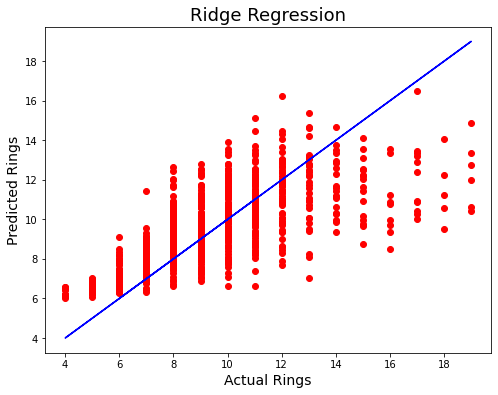

In [174]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_rd, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Rings',fontsize=14)
plt.ylabel('Predicted Rings',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

# Ensemble Techniques:

Decision Tree Regressor

In [125]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae'], 'splitter':['best', 'random']}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'mse', 'splitter': 'best'}


In [167]:
dt = DecisionTreeRegressor(criterion='friedman_mse', splitter='best')
dt.fit(xtrain,ytrain)
dt.score(xtrain,ytrain)
pred_decision = dt.predict(xtest)

dts = r2_score(ytest,pred_decision)
print('R2 Score:',dts*100)

dtscore = cross_val_score(dt,x,y,cv=2)
dtc = dtscore.mean() 
print('Cross Val Score:',dtc*100)

R2 Score: 1.6330319672582805
Cross Val Score: -1.0073256293407051


In [168]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_decision))
print('Mean Squared Error:',mean_squared_error(ytest,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_decision)))


Error:
Mean Absolute Error: 1.8908188585607941
Mean Squared Error: 7.28287841191067
Root Mean Square Error: 2.69868086514702


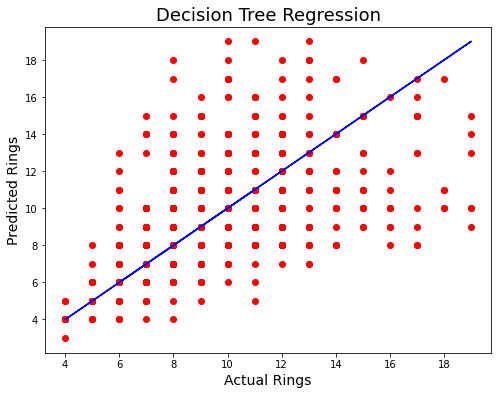

In [169]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_decision, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Rings',fontsize=14)
plt.ylabel('Predicted Rings',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

In [129]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['friedman_mse', 'mae'],'n_estimators':[100,200,300]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'mae', 'n_estimators': 300}


In [170]:
rf = RandomForestRegressor(criterion='mae',n_estimators=300)
rf.fit(xtrain,ytrain)
rf.score(xtrain,ytrain)
pred_random = rf.predict(xtest)

rfs = r2_score(ytest,pred_random)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=2)
rfc = rfscore.mean() 
print('Cross Val Score:',rfc*100)

R2 Score: 48.59422300615981
Cross Val Score: 47.449674734079004


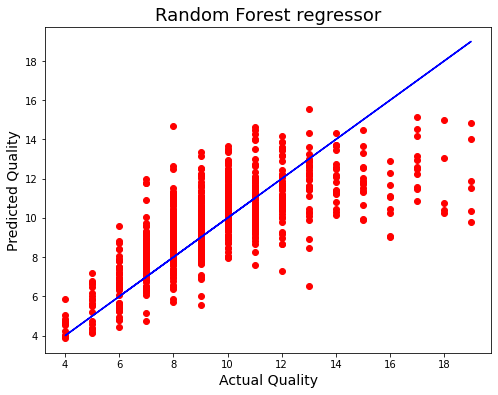

In [171]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_random, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Quality',fontsize=14)
plt.ylabel('Predicted Quality',fontsize=14)
plt.title('Random Forest regressor',fontsize=18)
plt.show()

In [158]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
gbr=GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'mse', 'loss': 'huber', 'n_estimators': 200}


In [159]:
gbr= GradientBoostingRegressor(criterion='mse',loss='huber',n_estimators=200)
gbr.fit(xtrain, ytrain)
gbr.score(xtrain, ytrain)
pred_random = gbr.predict(xtest)

gbrs= r2_score(ytest,pred_random)
print('R2 Score:',gbrs*100)

gbscore = cross_val_score(gbr,x,y,cv=2)
gbrc= gbscore.mean() 
print('Cross Val Score:',gbrc*100)

R2 Score: 49.596038047242786
Cross Val Score: 47.06716715180347


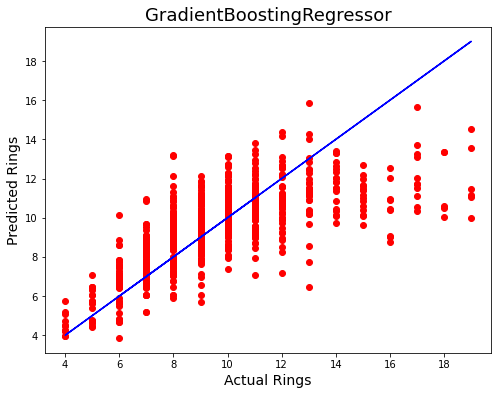

In [160]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_random, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Rings',fontsize=14)
plt.ylabel('Predicted Rings',fontsize=14)
plt.title('GradientBoostingRegressor',fontsize=18)
plt.show()

In [163]:
from sklearn.svm import SVR

parameters = { 'kernel': ['linear', 'poly','rbf', 'sigmoid'] ,'gamma': ['auto', 'scale']}
sv = SVR()
clf = GridSearchCV(sv,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'gamma': 'auto', 'kernel': 'rbf'}


In [164]:
sv = SVR(kernel = 'rbf', gamma = 'auto')
sv.fit(xtrain,ytrain)
sv.score(xtrain,ytrain)
pred_vector = sv.predict(xtest)

svs = r2_score(ytest,pred_vector)
print('R2 Score:',svs*100)

svscore = cross_val_score(sv,x,y,cv=2)
svc = svscore.mean() 
print('Cross Val Score:',svc*100)

R2 Score: 48.85141355570062
Cross Val Score: 46.759592264601835


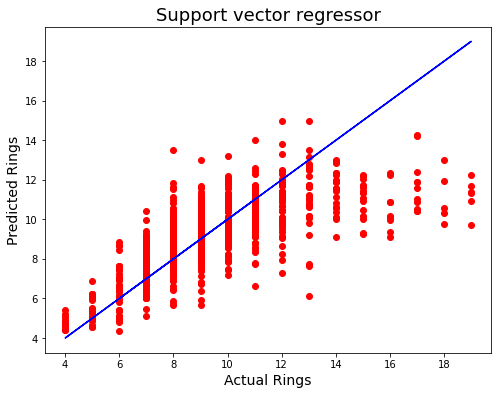

In [165]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_vector, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Rings',fontsize=14)
plt.ylabel('Predicted Rings',fontsize=14)
plt.title('Support vector regressor',fontsize=18)
plt.show()


# Conclusion

In [177]:
import numpy as np
a=np.array(ytest)
a

array([11, 10, 15,  8, 11,  8, 17, 10,  9, 14,  5, 11, 11,  5, 10,  9, 16,
        7,  9,  9,  8,  9,  8,  9,  7,  9,  6,  9,  6, 11, 11, 10,  9,  7,
       10, 11, 12, 13, 13, 10,  6,  8, 10, 12,  7,  9, 10,  8,  8, 11,  9,
        5,  8,  7,  9, 10,  9,  7,  8,  6,  9,  9, 11, 14, 11, 10,  9, 11,
        9,  7,  8,  8, 11, 12, 10,  7, 12, 12,  4, 17,  9,  9,  9,  9, 11,
        5,  8,  8, 13, 16, 12,  9, 13,  7, 11,  8,  9,  9,  9, 10, 10, 17,
       18,  7,  7,  9, 13,  7,  8,  8, 11,  7,  8,  6,  5, 10,  7,  7,  8,
       12,  7,  9,  8,  4,  7, 11, 11, 11,  8,  9, 11, 17, 16,  8,  6, 11,
       10,  9,  9, 19, 12,  7,  9,  6,  7, 19, 10, 10,  7,  9, 11, 10,  7,
       10,  8, 11,  8,  7,  7, 12, 11,  8, 10,  6,  7, 11,  4,  9,  6,  5,
       11, 10, 11,  8, 10, 11,  7,  8,  8, 10,  8, 14,  9, 13,  9, 10, 12,
        7,  9, 13,  8,  7, 10,  8,  8, 10, 10,  8,  8,  9, 15, 11,  9,  8,
       11,  9, 10,  6, 10, 12,  6,  9,  9, 19,  7, 11,  7,  9, 11, 10,  6,
        7,  9, 12, 10,  9

In [179]:
predicted=np.array(rf.predict(x_test))
predicted

array([ 8.07      ,  9.58166667, 11.81666667, 11.32      , 10.99333333,
        8.84666667, 12.45333333,  6.6       , 10.79333333, 11.64666667,
        7.45833333,  8.43      ,  6.05666667,  7.94333333, 12.48      ,
        7.11333333, 11.935     ,  9.69333333, 12.105     , 10.98333333,
        6.22666667,  5.24333333, 11.01333333,  9.55666667,  9.3       ,
       10.48666667, 12.00333333,  8.54166667,  7.84333333,  7.99      ,
       10.92333333, 12.38      ,  9.59      ,  9.65333333, 12.50666667,
       10.38      ,  7.82333333,  8.41666667,  9.69      , 10.86666667,
       15.11666667, 10.17      , 12.19      , 14.32666667,  9.24      ,
       12.49666667,  4.69333333,  5.51      , 10.41666667,  4.24333333,
       10.31666667,  9.23666667, 11.53333333, 10.77      ,  9.49666667,
        8.91666667, 12.54666667, 10.07      ,  6.77333333, 10.77      ,
        8.09666667, 12.175     ,  7.07333333,  9.87333333,  8.52      ,
        9.13333333,  8.69      , 11.83333333, 10.17      ,  9.73

In [180]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))

In [184]:
df_com

,original,predicted
0,11,8.070000
1,10,9.581667
2,15,11.816667
3,8,11.320000
4,11,10.993333
...,...,...
801,10,11.846667
802,7,8.773333
803,10,7.416667
804,10,12.473333


# model performs at 50% accuracy

# The best model is Random Forest Regressor. Since the difference between the percentage score of cross validation and r2_score is optimum.

In [190]:
import pickle
filename = 'Abalone.pkl'
pickle.dump(rf, open(filename, 'wb'))